**************************************************
Step 1: Gathering the data
**************************************************

The goal of this assignment is to construct, analyze, and publish a dataset of monthly traffic on English Wikipedia from January 1 2008 through August 30 2020.

We start with importing all the packages we need for doing the data analysis. 

In [2823]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

# for displaying the plots inline
%matplotlib inline

In order to measure Wikipedia traffic from 2008-2020, you will need to collect data from two different API endpoints, the Legacy Pagecounts API and the Pageviews API.

The Legacy Pagecounts API (documentation and endpoint links below) provides access to desktop and mobile traffic data from December 2007 through July 2016.
https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts https://wikimedia.org/api/rest_v1/#/Pagecounts_data_(legacy)/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end

The Pageviews API (documentation and endpoint links below) provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.
https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews
https://wikimedia.org/api/rest_v1/#/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end

The section below provides the API endpoints for Pagecounts and Pageview APIs with parameters to be passed provided within {}

In [2824]:
#Gathering the data
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

The code snippet provides the parameters in dictionary format with key value pairs that will be passed into endpoint url for each of the access methods. As we're interested in organic (user) traffic, as opposed to traffic by web crawlers or spiders, the Pageview API allows you to filter by agent=user. So we will use this additional parameter for page view. Based on the API documentation, we also pass in the headers a unique User-Agent or Api-User-Agent such as Email addresses or URLs of contact pages.

Please note that while Pageview API excludes spiders/crawlers, data from the Pagecounts API does not.

In [2825]:
#https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/en.wikipedia.org/desktop-site/monthly/2007120100/2016090100
#https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/en.wikipedia.org/mobile-site/monthly/2007120100/2016090100
#https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/desktop/user/monthly/2015070100/2020090100
#https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-app/user/monthly/2015070100/2020090100
#https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-web/user/monthly/2015070100/2020090100


desktop_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                "end" : "2016080100"
                    }

mobile_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2016080100"
                    }

desktop_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : "2020090100"
                        }

mobileapp_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : "2020090100"
                        }

mobileweb_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : "2020090100"
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/lakshmi2688',
    'From': 'lvenkat@uw.edu'
}

In the below code snippet, we define a function api_call which takes endpoint and parameters as arguments. The requests.get() function takes in these arguments and makes a call to the API. Response is received in json format.

In [2826]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

For each of the 5 access methods namely, mobile-app, mobile-web,desktop for pageviews and desktop-site and mobile-site for pagecounts, we pass the corresponding end points and parameters to api_call function defined above to get the response in json format.

In [2827]:
pagecounts_desktopsite_200712_201608 = api_call(endpoint_legacy, desktop_params_legacy)
pagecounts_mobilesite_200712_201608 = api_call(endpoint_legacy, mobile_params_legacy)
pageviews_desktop_201507_202009 = api_call(endpoint_pageviews, desktop_params_pageviews)
pageviews_mobileapp_201507_202009 = api_call(endpoint_pageviews, mobileapp_params_pageviews)
pageviews_mobileweb_201507_202009 = api_call(endpoint_pageviews, mobileweb_params_pageviews)

Write the source files into json files

In [2828]:
with open('C:/Users/Lakshmi/Desktop/UW DataScience application/Data 512/Week 1/pagecounts_desktop-site_200712-202008.json', 'w') as f:
    json.dump(pagecounts_desktopsite_200712_201608, f, ensure_ascii=False)
    
with open('C:/Users/Lakshmi/Desktop/UW DataScience application/Data 512/Week 1/pagecounts_mobile-site_200712-202008.json', 'w') as f:
    json.dump(pagecounts_mobilesite_200712_201608, f, ensure_ascii=False)
    
with open('C:/Users/Lakshmi/Desktop/UW DataScience application/Data 512/Week 1/pageviews_desktop_200712-202008.json', 'w') as f:
    json.dump(pageviews_desktop_201507_202009, f, ensure_ascii=False)
    
with open('C:/Users/Lakshmi/Desktop/UW DataScience application/Data 512/Week 1/pageviews_mobile-app_200712-202008.json', 'w') as f:
    json.dump(pageviews_mobileapp_201507_202009, f, ensure_ascii=False)
    
with open('C:/Users/Lakshmi/Desktop/UW DataScience application/Data 512/Week 1/pageviews_mobile-web_200712-202008.json', 'w') as f:
    json.dump(pageviews_mobileweb_201507_202009, f, ensure_ascii=False)

**************************************************
Step 2: Processing the data
**************************************************
For all data, we separate the value of timestamp into four-digit year (YYYY) and two-digit month (MM) by iterating through the list of dictionary and slicing the timestamp.

In [2829]:
for item in pageviews_mobileapp_201507_202009["items"]:
    item["Year"] = item["timestamp"][0:4]
    item["month"] = item["timestamp"][4:6]

In [2830]:
for item in pageviews_mobileweb_201507_202009["items"]:
    item["Year"] = item["timestamp"][0:4]
    item["month"] = item["timestamp"][4:6]

In [2831]:
for item in pageviews_desktop_201507_202009["items"]:
    item["Year"] = item["timestamp"][0:4]
    item["month"] = item["timestamp"][4:6]

In [2832]:
for item in pagecounts_desktopsite_200712_201609["items"]:
    item["Year"] = item["timestamp"][0:4]
    item["month"] = item["timestamp"][4:6]

In [2833]:
for item in pagecounts_mobilesite_200712_201609["items"]:
    item["Year"] = item["timestamp"][0:4]
    item["month"] = item["timestamp"][4:6]

For performing further data analysis, we would need to convert the dict into a dataframe. In order to do this,
we first convert dict to json string using json.dumps() function. Then json string is converted to python dataframe by using pd.read_json function.We pass the value convert_dates = False to read_json so that format of timestamp is not changed.

In [2834]:
pageviews_mobileapp_201507_202009_str = json.dumps(pageviews_mobileapp_201507_202009["items"])
df1a = pd.read_json(pageviews_mobileapp_201507_202009_str,convert_dates = False)

pageviews_mobileweb_201507_202009_str = json.dumps(pageviews_mobileweb_201507_202009["items"])
df1b = pd.read_json(pageviews_mobileweb_201507_202009_str,convert_dates = False)

pageviews_desktop_201507_202009_str = json.dumps(pageviews_desktop_201507_202009["items"])
df2 = pd.read_json(pageviews_desktop_201507_202009_str,convert_dates = False)

pagecounts_mobilesite_200712_201609_str = json.dumps(pagecounts_mobilesite_200712_201609["items"])
df3 = pd.read_json(pagecounts_mobilesite_200712_201609_str,convert_dates = False)

pagecounts_desktopsite_200712_201609_str = json.dumps(pagecounts_desktopsite_200712_201609["items"])
df4 = pd.read_json(pagecounts_desktopsite_200712_201609_str,convert_dates = False)

Once we have all the dataframes, 
1)Combine the monthly values for mobile-app and mobile-web to create total mobile traffic count for each month.
This is 'pageviews_mobile' dataframe. 
2)Combine pageview mobile and pageview desktop into a single pageview dataframe namely 'pageviews_all'
3)Combine pagecount mobile and pagecount desktop into a single pagecount dataframe namely 'pagecounts_all'

In [2835]:
#Combine the monthly values for mobile-app and mobile-web to create total mobile traffic count for each month.
pageviews_mobile = pd.DataFrame(np.vstack([df1a,df1b]))

#Combine pageview mobile and pageview desktop into a single pageview dataframe namely 'pageviews_all'
pageviews_all = pd.DataFrame(np.vstack([pageviews_mobile, df2]))

#Combine pagecount mobile and pagecount desktop into a single pagecount dataframe namely 'pagecounts_all'
pagecounts_all = pd.DataFrame(np.vstack([df4,df3]))

Drop all the unwanted columns based on index. We remove the columns project, granularity, timestamp for pagecounts and pageview. In addition, we also remove agent column for pageview. After this, we reset the column index.

In [2836]:
pageviews_all.drop(pageviews_all.columns[[0, 2, 3, 4]], axis=1, inplace=True)
pageviews_all.columns = range(pageviews_all.shape[1]) 

pagecounts_all.drop(pageviews_all.columns[[0, 2, 3]], axis=1, inplace=True)
pagecounts_all.columns = range(pagecounts_all.shape[1]) 

We should have 4 columns for each dataframe now

In [2837]:
print("pagecounts_all.shape",pagecounts_all.shape)
print("pageviews_all.shape",pageviews_all.shape)

pagecounts_all.shape (126, 4)
pageviews_all.shape (186, 4)


Combine pageviews and pagecounts data into one dataframe. The combine datset should have 312 rows and 4 columns
We raname the columns from int index to string headers

In [2838]:
#combine all the data into one
df_all = pd.DataFrame(np.vstack([pagecounts_all,pageviews_all]))
print("df_all.shape",df_all.shape)

#Rename the columns
df_all.columns = ["Source","Views","Year","Month"]

df_all.shape (312, 4)


We pivot the data frame by converting rows 'source' into columns aggregating values by taking the first observation in the group.We can also use np.sum aggregation as there's only one observation per group. The results won't change. We can also fill missing values using the fill_value parameter.

In [2839]:
df_all = pd.pivot_table(df_all, values =['Views'], index=['Year','Month'], columns=['Source'],fill_value=0, aggfunc='first')

We further format the pivot table by returning DataFrame with requested index / column level(s) removed, rename the columns to none and resetting the index inplace to get the dataframe structure.

In [2840]:
df_all.columns = df_all.columns.droplevel(0)
df_all.columns.rename(None, inplace=True)
df_all.reset_index(inplace=True)

Create a new column"mobile" that combines pageview mobile-web and mobile-app data. We then drop the individual columns mobiel-app and mobile-web

In [2841]:
df_all["mobile"] = df_all["mobile-app"] + df_all["mobile-web"] 
df_all.drop(["mobile-web","mobile-app"], axis=1, inplace=True)


We rename the columns inplace even more suitably

In [2842]:
df_all.rename(columns={'Year': 'year', 'Month': 'month', 'desktop': 'pageview_desktop_views', 'mobile': 'pageview_mobile_views', 'desktop-site': 'pagecount_desktop_views', 'mobile-site': 'pagecount_mobile_views'}, inplace=True)

Our dataframe looks like below at this stage:

In [2843]:
df_all.head()

,year,month,pageview_desktop_views,pagecount_desktop_views,pagecount_mobile_views,pageview_mobile_views
0,2007,12,0,2998331524,0,0
1,2008,1,0,4930902570,0,0
2,2008,2,0,4818393763,0,0
3,2008,3,0,4955405809,0,0
4,2008,4,0,5159162183,0,0


Create 2 more columns "pageview_all_views" which combines pageview mobile and pageview desktop data, and "pagecount_all_views" which combines pagecount desktop and pagecount mobile data

In [2844]:
df_all["pageview_all_views"] = df_all["pageview_desktop_views"] + df_all["pageview_mobile_views"]
df_all["pagecount_all_views"] = df_all["pagecount_mobile_views"] + df_all["pagecount_desktop_views"]


Our dataframe looks like below at this stage:

In [2845]:
df_all.head()

,year,month,pageview_desktop_views,pagecount_desktop_views,pagecount_mobile_views,pageview_mobile_views,pageview_all_views,pagecount_all_views
0,2007,12,0,2998331524,0,0,0,2998331524
1,2008,1,0,4930902570,0,0,0,4930902570
2,2008,2,0,4818393763,0,0,0,4818393763
3,2008,3,0,4955405809,0,0,0,4955405809
4,2008,4,0,5159162183,0,0,0,5159162183


Write all data into a single CSV file 'en-wikipedia_traffic_200712-202008.csv'

In [2846]:
df_all.to_csv('C:/Users/Lakshmi/Desktop/UW DataScience application/Data 512/Week 1/en-wikipedia_traffic_200712-202009.csv', index=False, encoding='utf-8')

**************************************************
Step 3: Analyze the data
**************************************************
We start analyzing the data by eveluating the datatypes. 

In [2847]:
df_all.dtypes

year                       int64
month                      int64
pageview_desktop_views     int64
pagecount_desktop_views    int64
pagecount_mobile_views     int64
pageview_mobile_views      int64
pageview_all_views         int64
pagecount_all_views        int64
dtype: object

In order to convert the data into time series data, 
1)We combine the year and month into a datetime format. We assign the day of the month as 1 as day information is not available. This assignment is reasonable as we are analyzing the monthly data. 
2)Inorder to get rid of leading and trailing zeros in time series data, we reset the index and convert into dataframe format and use slicing to get rid of leading and trailing zeros.
3) After removing leading and trailing zeros, set the date as index again and plot the series that has pagecount/pageview values vs date as index
4) Repeat this for all the required plots

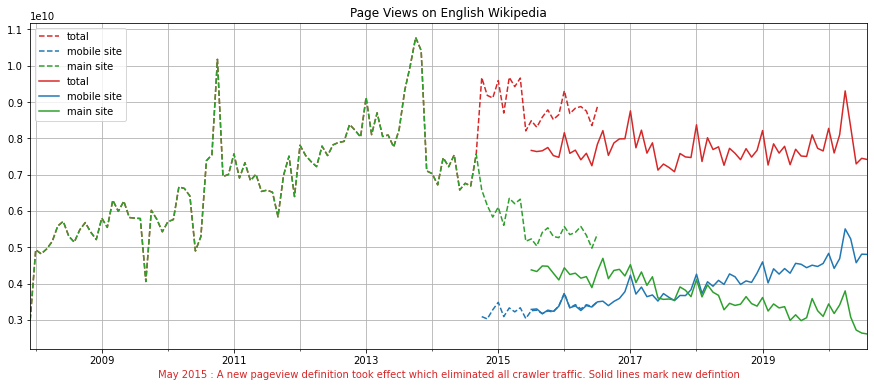

In [2848]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.set_title('Page Views on English Wikipedia')
ax.grid(True)

# We convert the dataframe into series structure by setting the index to YYY-MM-DD format
df = df_all.set_index(pd.to_datetime(df_all[['year','month']].assign(day=1)))['pagecount_all_views']
# inorder to get rid of leading and trailing zeros, we reset the index and convert into dataframe format and get the index where values are non zeros from top and bottom
df = df.reset_index().loc[df_all['pagecount_all_views'].ne(0).idxmax():df_all['pagecount_all_views'].ne(0)[::-1].idxmax()]
#after removing leading and trailing zeros, set the date as index again and plot the series that has pagecount values and date as index
ax = df.set_index(df['index'])['pagecount_all_views'].plot(color='tab:red', linestyle='--', label='total')

# We convert the dataframe into series structure by setting the index to YYY-MM-DD format
df = df_all.set_index(pd.to_datetime(df_all[['year','month']].assign(day=1)))['pagecount_mobile_views']
# inorder to get rid of leading and trailing zeros, we reset the index and convert into dataframe format and get the index where values are non zeros from top and bottom
df= df.reset_index().loc[df_all['pagecount_mobile_views'].ne(0).idxmax():df_all['pagecount_mobile_views'].ne(0)[::-1].idxmax()]
#after removing leading and trailing zeros, set the date as index again and plot the series that has pagecount values and date as index
ax = df.set_index(df['index'])['pagecount_mobile_views'].plot(color='tab:blue', linestyle='--', label='mobile site')

# We convert the dataframe into series structure by setting the index to YYY-MM-DD format
df = df_all.set_index(pd.to_datetime(df_all[['year','month']].assign(day=1)))['pagecount_desktop_views']
# inorder to get rid of leading and trailing zeros, we reset the index and convert into dataframe format and get the index where values are non zeros from top and bottom
df= df.reset_index().loc[df_all['pagecount_desktop_views'].ne(0).idxmax():df_all['pagecount_desktop_views'].ne(0)[::-1].idxmax()]
#after removing leading and trailing zeros, set the date as index again and plot the series that has pagecount values and date as index
ax = df.set_index(df['index'])['pagecount_desktop_views'].plot(color='tab:green', linestyle='--', label='main site')

# We convert the dataframe into series structure by setting the index to YYY-MM-DD format
df = df_all.set_index(pd.to_datetime(df_all[['year','month']].assign(day=1)))['pageview_all_views']
# inorder to get rid of leading and trailing zeros, we reset the index and convert into dataframe format and get the index where values are non zeros from top and bottom
df= df.reset_index().loc[df_all['pageview_all_views'].ne(0).idxmax():df_all['pageview_all_views'].ne(0)[::-1].idxmax()]
#after removing leading and trailing zeros, set the date as index again and plot the series that has pageview values and date as index
ax = df.set_index(df['index'])['pageview_all_views'].plot(color='tab:red', linestyle='-', label='total')

# We convert the dataframe into series structure by setting the index to YYY-MM-DD format
df = df_all.set_index(pd.to_datetime(df_all[['year','month']].assign(day=1)))['pageview_mobile_views']
# inorder to get rid of leading and trailing zeros, we reset the index and convert into dataframe format and get the index where values are non zeros from top and bottom
df= df.reset_index().loc[df_all['pageview_mobile_views'].ne(0).idxmax():df_all['pageview_mobile_views'].ne(0)[::-1].idxmax()]
#after removing leading and trailing zeros, set the date as index again and plot the series that has pageview values and date as index
ax = df.set_index(df['index'])['pageview_mobile_views'].plot(color='tab:blue', linestyle='-', label='mobile site')

# We convert the dataframe into series structure by setting the index to YYY-MM-DD format
df = df_all.set_index(pd.to_datetime(df_all[['year','month']].assign(day=1)))['pageview_desktop_views']
# inorder to get rid of leading and trailing zeros, we reset the index and convert into dataframe format and get the index where values are non zeros from top and bottom
df = df.reset_index().loc[df_all['pageview_desktop_views'].ne(0).idxmax():df_all['pageview_desktop_views'].ne(0)[::-1].idxmax()]
#after removing leading and trailing zeros, set the date as index again and plot the series that has pageview values and date as index
ax = df.set_index(df['index'])['pageview_desktop_views'].plot(color='tab:green', linestyle='-', label='main site')

# Set all the minor and major grid lines both in x axis and y axis direction
ax.xaxis.grid(True, which="minor")
ax.xaxis.grid(True, which="major")
ax.yaxis.grid(True, which="minor")
ax.yaxis.grid(True, which="major")

# label the xaxis as below
ax.set_xlabel('May 2015 : A new pageview definition took effect which eliminated all crawler traffic. Solid lines mark new defintion',color='tab:red')

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left');

Save the above plot into a jpg file 'en-wikipedia_traffic_200712-202009.jpg'

In [2849]:
fig.savefig('C:/Users/Lakshmi/Desktop/UW DataScience application/Data 512/Week 1/en-wikipedia_traffic_200712-202009.jpg')